Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 79s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


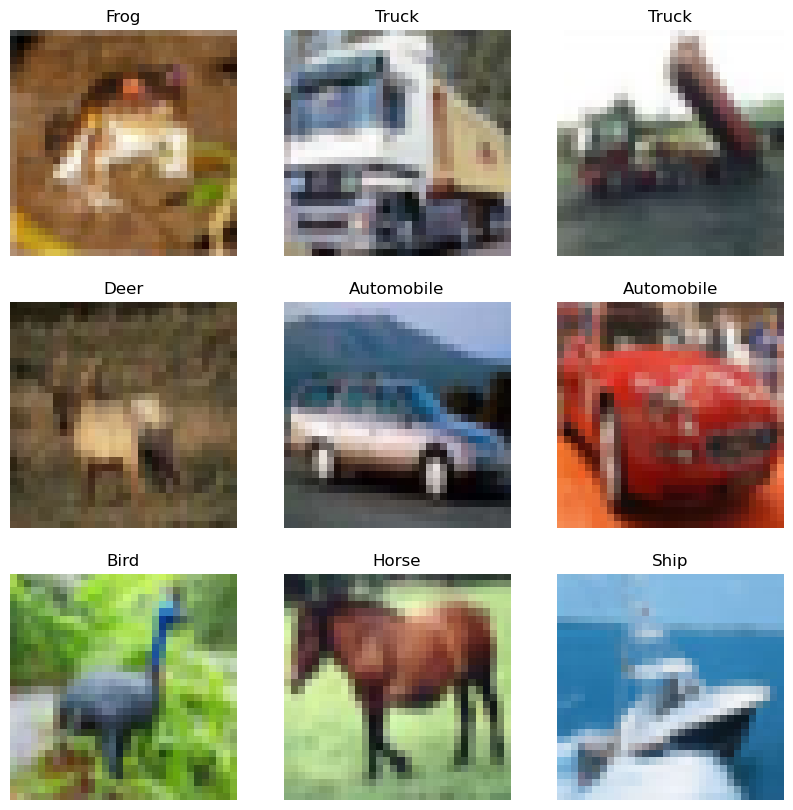

Building the CNN model...
Compiling the model...
Training the CNN...


c:\Users\leewa\anaconda3\a cute anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.3290 - loss: 1.8117 - val_accuracy: 0.5266 - val_loss: 1.3009
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5455 - loss: 1.2677 - val_accuracy: 0.5866 - val_loss: 1.1836
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.6195 - loss: 1.0868 - val_accuracy: 0.6253 - val_loss: 1.0552
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.6567 - loss: 0.9862 - val_accuracy: 0.6681 - val_loss: 0.9503
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6830 - loss: 0.9058 - val_accuracy: 0.6639 - val_loss: 0.9538
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7065 - loss: 0.8362 - val_accuracy: 0.6828 - val_loss: 0.9177
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.7227 - loss: 0.7952 - val_accuracy: 0.6810 - val_loss: 0.9362
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.7392 - loss: 0.7502 - 

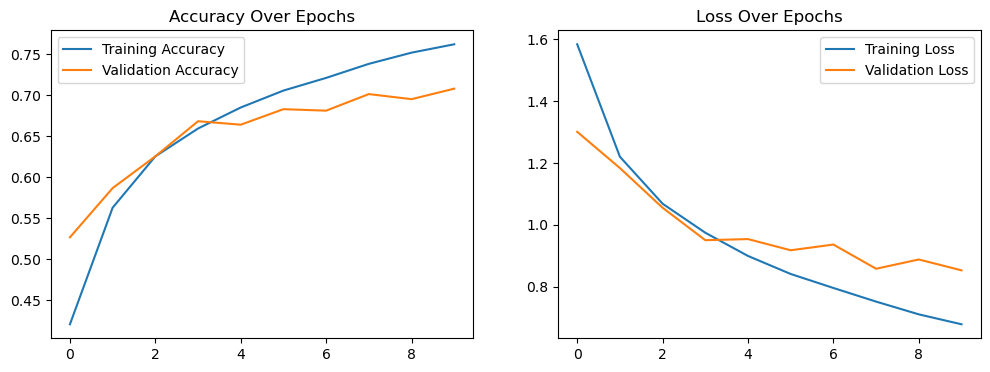

Making predictions on test data...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


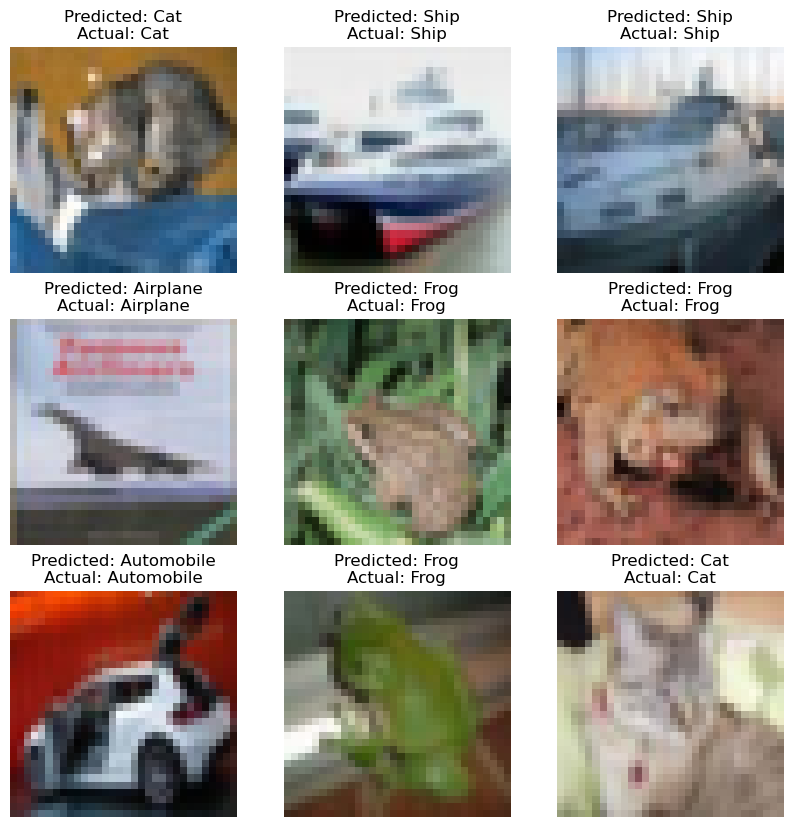

In [1]:

# The code represents Convolutional Neural Network (CNN)
#It is used to classify images from CIFAR-10 dataset.
#The dataset consists of 60,000 32 x 32 color images in 10 classes, with 6,000 images per class.
#There are 50,000 training images and 10,000 test images.




import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

#The below code will load the dataset
#The dataset is divided into training and testing data
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()


print("Building the CNN model...")
model = models.Sequential([
    #the below code will create the convolutional layer, its for level 1.
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),  # Max pooling layer
    
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    #the below code will create the flatten layer.
    layers.Flatten(),
    
    
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  
])


print("Compiling the model...")
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


print("Training the CNN...")
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test), 
                    batch_size=64)


print("Evaluating the model...")
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


print("Plotting training history...")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()


print("Making predictions on test data...")
predictions = model.predict(x_test)


plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i])
    predicted_label = class_names[np.argmax(predictions[i])]
    actual_label = class_names[y_test[i][0]]
    plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}")
    plt.axis('off')
plt.show()
